In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:

#read the US. Pumpkins data
pumpkins = pd.read_csv("C:/Users/User/Downloads/US-pumpkins.csv")
#Filter out any rows that do not use price per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head(2)


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [19]:
#Empty cells in each column
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [21]:
#Choose columns to keep
new_columns = ['Package','Month','Low Price','High Price','Date']
#Drop all other columns
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis= 1)

In [39]:
#Calculate the average price from the high and low prices
price =(pumpkins['Low Price'] + pumpkins['High Price'])/2
#Get the month from the date column
month = pd.DatetimeIndex(pumpkins['Date']).month
#Create new dataframe with the columns
new_pumpkins=pd.DataFrame({'Month':month,'Package':pumpkins['Package'], 'Low Price':pumpkins['Low Price'], 'High Price':pumpkins['High Price']})

In [40]:
#Convert the price of all cell prices 1 1/9 bushels by dividing by 1 1/9
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = price/(1 + 1/9)
#Convert the price of all cell prices 1/2 bushels by dividing by 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = price/(1/2)

In [41]:
#Printing the first few rows from the dataframe
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


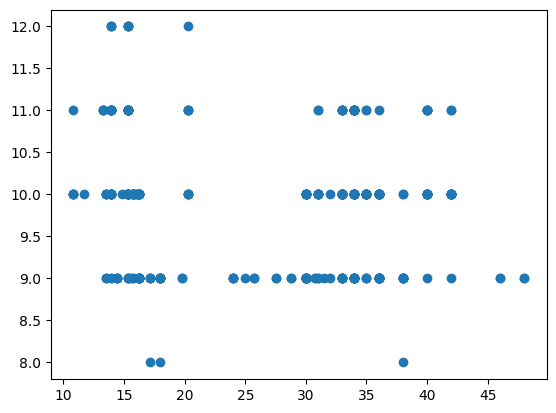

In [30]:
#get the values we want to plot
price = new_pumpkins.Price
month = new_pumpkins.Month
#create a scatter plot
plt.scatter(price,month)
plt.show()

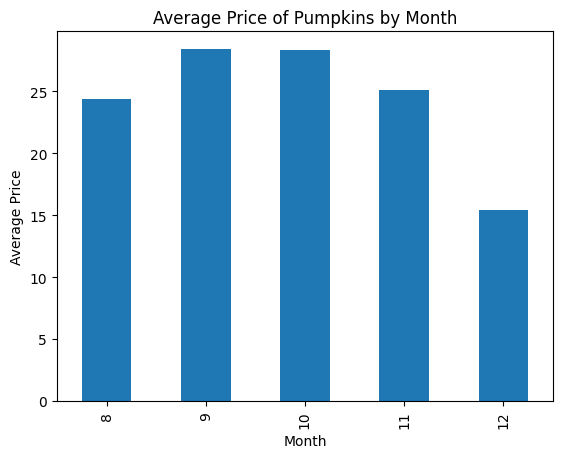

In [44]:

# Group by 'Month' and calculate mean price
grouped_data = new_pumpkins.groupby('Month')['Price'].mean()

# Plot as a bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price of Pumpkins by Month')
plt.show()